In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
from torch import functional as F
from VGG import VGGLoss
import os


In [2]:
pic1 = "waves.jpg"
pic2 = "waves2.jpg"
pic3 = "flickr_dog_000016.jpg"
pic4 = "flickr_dog_000017.jpg"
pic5 = "flickr_wild_000474.jpg"
pic6 = "flickr_wild_000474r.jpg"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load image with matplotlib
# img = plt.imread(pic1)
# print(img.shape)
# plt.imshow(img)
# plt.show()
# img = plt.imread(pic2)
# plt.imshow(img)
# plt.show()


# Load the image
img1 = Image.open(pic1)
img2 = Image.open(pic2)
img3 = Image.open(pic3)
img4 = Image.open(pic4)
img5 = Image.open(pic5)
img6 = Image.open(pic6)
# img7 = Image.open(pic7)
random_array = np.random.randint(0, 256, (512, 512, 3), dtype=np.uint8)
img7 = Image.fromarray(random_array)
# img7.show()

# Convert the image to a tensor
transform = transforms.ToTensor()
img1 = transform(img1)
img2 = transform(img2)
img3 = transform(img3)
img4 = transform(img4)
img5 = transform(img5)
img6 = transform(img6)
img7 = transform(img7)

# Add a batch dimension
img1 = img1.unsqueeze(0).to(device)
img2 = img2.unsqueeze(0).to(device)
img3 = img3.unsqueeze(0).to(device)
img4 = img4.unsqueeze(0).to(device)
img5 = img5.unsqueeze(0).to(device)
img6 = img6.unsqueeze(0).to(device)
img7 = img7.unsqueeze(0).to(device)

print("calculating loss")
vgg = VGGLoss(device)
print(vgg(img1, img2).item())
print(vgg(img1, img3).item())
print(vgg(img1, img4).item())
print(vgg(img1, img5).item())
print(vgg(img1, img6).item())
print(vgg(img1, img7).item())
print(vgg(img2, img3).item())
print(vgg(img2, img4).item())
print(vgg(img2, img5).item())
print(vgg(img2, img6).item())
print(vgg(img2, img7).item())
print(vgg(img3, img4).item())
print(vgg(img3, img5).item())
print(vgg(img3, img6).item())
print(vgg(img3, img7).item())
print(vgg(img4, img5).item())
print(vgg(img4, img6).item())
print(vgg(img4, img7).item())
print(vgg(img5, img6).item())
print(vgg(img5, img7).item())
print(vgg(img6, img7).item())



calculating loss
18.861997604370117
22.281246185302734
21.857282638549805
23.020587921142578
22.39206886291504
31.042797088623047
15.791766166687012
15.35057544708252
17.277280807495117
16.507530212402344
27.205814361572266
14.491854667663574
17.78827667236328
17.082006454467773
28.120786666870117
17.200328826904297
16.417654037475586
27.692846298217773
0.5374338030815125
29.747913360595703
29.189485549926758


In [3]:
directory = "HR_images"
max = -1
min = 999999
max_im = ""
min_im = ""
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg"):
        img2 = Image.open(os.path.join(directory, filename))
        img2 = transform(img2)
        img2 = img2.unsqueeze(0).to(device)
        temp = vgg(img1, img2).item()
        if temp > max:
            max = temp
            max_im = filename
        if temp < min:
            min = temp
            min_im = filename
        continue
    else:
        continue




KeyboardInterrupt: 

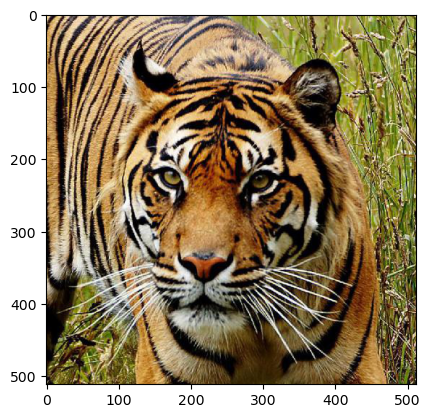

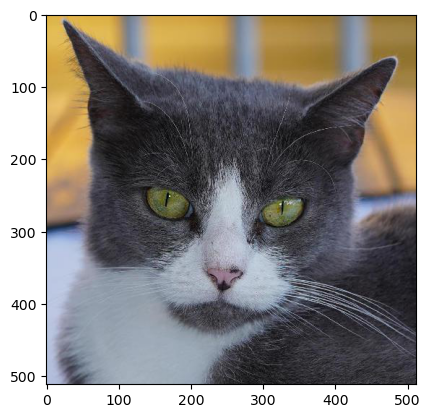

9.593480110168457


In [5]:
max_im_path = os.path.join(directory, max_im)
min_im_path = os.path.join(directory, min_im)

img1 = plt.imread(max_im_path)
plt.imshow(img1)
plt.show()
img1 = plt.imread(min_im_path)
plt.imshow(img1)
plt.show()
print(max)